In [1]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.io import ascii 
import astropy.coordinates as coord 
import astropy.units as u 
import ephem 
import sys 
from astropy.coordinates import Longitude 
import matplotlib.cm as cm
from astropy.coordinates import SkyCoord

In [2]:
#Import data
data=np.genfromtxt("../BNS-MergerRates/data/200mpc_v1_1.txt")

In [4]:
#Map editing
cool_cmap = cm.jet
cool_cmap.set_under("w")
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
font2 = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 15,
        }

In [5]:
#Select columns of data
ra1=data[:,0]*u.deg #give units
ra1.wrap_angle=180*u.deg 
dec1=data[:,1]*u.degree #give units
mass1=data[:,7]
real=(np.where(mass1>6) and np.where(mass1<12)) #Select physical stellar masses
#Selection of data based on stellar masses constraints:
mass=mass1[real]
ra=ra1[real]
dec=dec1[real]

In [6]:
#Masking of galactic plane and surrounding area
skyCoordArray=SkyCoord(ra=ra,dec=dec,frame='icrs')
galCoordArray=skyCoordArray.galactic
sele=np.where(abs(galCoordArray.b.value)>12)[0]

In [7]:
#Stellar masses of ultra-faint dwarf galaxies with high resolution spectroscopy analysis.

HorI=2.4*10**3;
BooI=29*10**3;
BooII=10**3;
RetII=2.6*10**3;
ComBer=3.7*10**3;
CVnII=7.9*10**3;
Her=37*10**3;
Segue1=0.34*10**3;
Segue2=0.86*10**3;
UMaII=4*10**3;
LeoIV=19*10**3;
TucII=3*10**3;
TucIII=0.8*10**3;
totalMass=HorI+BooI+BooII+RetII+ComBer+CVnII+Her+Segue1+Segue2+UMaII+LeoIV+TucII+TucIII;
totalMass

111600.0

In [8]:
#Calculation of rate
def calcRate(reticMass, retTime, totalMass, mass): #mass of Reticulum II, lookback-time of event, total mass of dwarf galaxies with high resolution spectroscopy analysis, mass array
    """Calculate rate of BNS merger events in a given galaxy, taking Reticulum II as base case"""
    rateRet=(1/totalMass)*(1/retTime) #10**(-15) BNS merger event per stellar mass per year in Ret II
    rate=rateRet*10**mass #rate of events for each galaxy
    return rate

In [3]:
#Overview of calculated rates per galaxy
rateArray=calcRate(2.6*10**3,((1.382*10**10)-(1.003**9)),totalMass,mass)

NameError: name 'calcRate' is not defined

In [9]:
def plot_cNumber(ra,dec):
    """creates map of cumulative number of galaxies in each pixel of the sky"""
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    '''
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection="mollweide")
    hb=ax.hexbin(ra,dec,gridsize=300,reduce_C_function=np.sum,vmax=20,cmap=cool_cmap)
    cb=fig.colorbar(hb,orientation='horizontal',cax=fig.add_axes([0.2, 0, 0.6, 0.03]))
    ax.set_title("Integrated number of galaxies per pixel",fontdict=font)
    ax.set_xlabel("RA",fontdict=font2)
    ax.set_ylabel("Dec",fontdict=font2)
    plt.show()

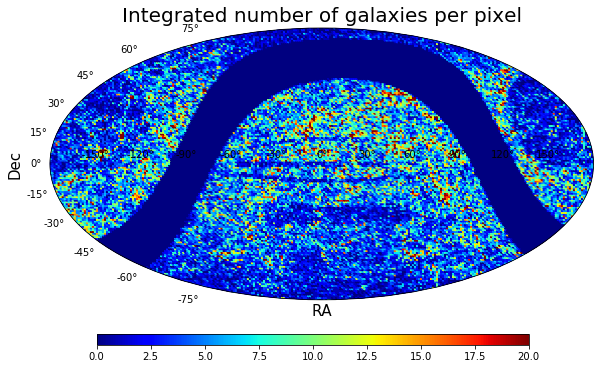

In [10]:
plot_cNumber(np.radians(ra[sele].value),np.radians(dec[sele].value))

In [256]:
def plot_cMass(ra,dec,mass):
    """creates map of cumulative mass per pixel in sky"""
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide'
    '''
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection="mollweide")
    hb=ax.hexbin(ra,dec,gridsize=300,C=10**mass,reduce_C_function=np.sum,cmap=cool_cmap,bins='log',vmin=8,vmax=12)
    cb=fig.colorbar(hb,orientation='horizontal',cax=fig.add_axes([0.2, 0, 0.6, 0.03]))
    ax.set_title("Integrated stellar mass per pixel",fontdict=font)
    ax.set_xlabel("RA",fontdict=font2)
    ax.set_ylabel("Dec",fontdict=font2)
    plt.show()

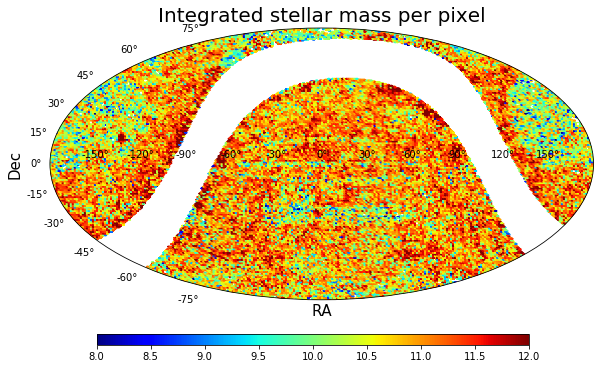

In [257]:
plot_cMass(np.radians(ra[sele].value),np.radians(dec[sele].value),mass[sele])

In [16]:
def plot_cRate(ra,dec,mass):
    """Plot cumulative rate of BNS merger events in every pixel of sky"""
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection="mollweide")
    hb=ax.hexbin(ra,dec,gridsize=300,C=calcRate(2.6*10**3,((13.82*10**9)-(1.003*10**9)),totalMass,mass),reduce_C_function=np.sum,bins='log',vmin=10**(-8),vmax=10**(-4),cmap=cool_cmap)
    cb=fig.colorbar(hb,orientation='horizontal',cax=fig.add_axes([0.2, 0, 0.6, 0.03]))
    ax.set_title("Integrated number of event rates per pixel",fontdict=font)
    ax.set_xlabel("RA",fontdict=font2)
    ax.set_ylabel("Dec",fontdict=font2)
    plt.show()

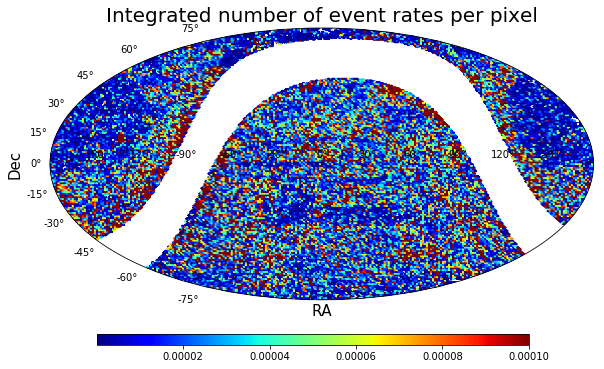

In [17]:
plot_cRate(np.radians(ra[sele].value),np.radians(dec[sele].value),mass[sele])

In [13]:
#Calculating Rate
Mass200mpc=np.nansum(10**mass[sele])
Rate200mpc=Mass200mpc*(1/totalMass)*(1/((13.82*10**9)-(1.003*10**9))) #scaling up for total mass in 200 mpc volume
volumeT=(10**9) # mpc^3 in gpc^3
volume200=(4/3)*np.pi*(200)**3
FinalRate=Rate200mpc*volumeT/volume200
FinalRate

223.32494606519521

In [20]:
Mass1Gpc3=Mass200mpc*volumeT/volume200
Mass1Gpc3

3.1943891104288493e+17

In [252]:
#Show maps with healpy (better because pixels are equal area)
import healpy
pix=healpy.ang2pix(64,ra[sele].value,dec[sele].value,lonlat=True)
hpmap=np.zeros(healpy.nside2npix(64))
np.add.at(hpmap,pix,10**mass[sele])

/Users/KarenPerezSarmiento/Library/Python/3.5/lib/python/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


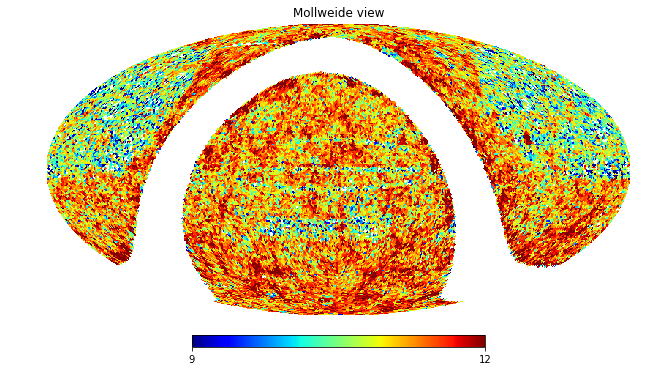

In [253]:
healpy.mollview(np.log10(hpmap),min=9,max=12,cmap=cool_cmap)